#### Benefits of Feature Scaling:

**Improved Convergence Speed**: For gradient descent-based algorithms, scaling ensures that the cost function has a more uniform landscape, allowing the optimizer to converge to the minimum much faster.                                                                                                
**Enhanced Model Performance**: By preventing features with larger scales from dominating, scaling allows algorithms to learn from all features more effectively, leading to more accurate predictions.                                                                                                    
**Fairer Feature Contribution**: In distance-based algorithms, scaling ensures that all features contribute more equally to the distance calculations, providing a more balanced representation of similarity.                                                                                               
**Effective Regularization**: For models using regularization, scaling ensures that the penalty is applied equitably to all coefficients, preventing bias towards features with naturally larger magnitudes.

## Standardization: Transforming Data to a Unit Normal Distribution

Standardization, often implemented using Scikit-learn's StandardScaler, is a widely used feature scaling technique. Its primary goal is to transform your numerical features such that they have the properties of a standard normal distribution: a mean of 0 and a standard deviation of 1.               

Mathematically, standardization is achieved by subtracting the mean of the feature from each data point and then dividing by the standard deviation of the feature. After standardization, the resulting distribution of the feature will have a mean of approximately 0 and a standard deviation of approximately 1. It's important to note that standardization does not bound values to a specific range; it only centers the data around zero and scales it based on its spread.

#### Why Use Standardization?
Standardization is particularly beneficial for algorithms that assume your data is normally distributed or that rely on the mean and standard deviation of features. This includes:

**Linear Models**: Linear Regression, Logistic Regression.                                                                                            
**SVMs**: Support Vector Machines.                                                                                                                     
**PCA**: Principal Component Analysis.                                                                                                                
**Algorithms using Gradient Descent**: As discussed earlier, it significantly speeds up convergence.                                                  
It's also a good default choice when you are unsure about the distribution of your data or when the algorithm does not have specific range requirements.

#### Hands-On: Applying Standardization to Numerical Features

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
data = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [50000, 60000, 75000, 90000, 110000, 130000, 150000, 170000, 190000, 210000],
    'Experience': [2, 5, 8, 12, 15, 18, 22, 25, 28, 30]
}
df = pd.DataFrame(data)
print(df)

   Age  Income  Experience
0   25   50000           2
1   30   60000           5
2   35   75000           8
3   40   90000          12
4   45  110000          15
5   50  130000          18
6   55  150000          22
7   60  170000          25
8   65  190000          28
9   70  210000          30


In [3]:
# 1. Initialising the StandardScaler
scaler = StandardScaler()

# 2. Fit the scaler to the data and transform it
# We'll fit and transform all numerical columns at once
# In a real scenario, you'd split data into train/test first
# and fit only on training data.
df_scaled = scaler.fit_transform(df)

# 3. Convert the scaled NumPy array back to a Pandas DataFrame
# It's good practice to keep column names
df_new = pd.DataFrame(df_scaled, columns=df.columns)

print('Standardized DataFrame: ')
print(df_new)

Standardized DataFrame: 
        Age    Income  Experience
0 -1.566699 -1.391444   -1.566767
1 -1.218544 -1.202132   -1.242608
2 -0.870388 -0.918164   -0.918449
3 -0.522233 -0.634196   -0.486238
4 -0.174078 -0.255571   -0.162079
5  0.174078  0.123053    0.162079
6  0.522233  0.501677    0.594291
7  0.870388  0.880301    0.918449
8  1.218544  1.258926    1.242608
9  1.566699  1.637550    1.458714


In [5]:
# 4. Verify the mean and standard deviation of the scaled features
print('Mean of scaled features:', df_scaled.mean())
print('Standard Deviation of scaled features:',df_scaled.std())

Mean of scaled features: 1.4802973661668754e-17
Standard Deviation of scaled features: 1.0


In [8]:
# Let's look at the effect on a single feature, e.g., 'Income'
original_income = df['Income']
scaled_income = df_new['Income']
print('Original Income Mean:', original_income.mean())
print('Original Income Std Dev:', original_income.std())
print('Scaled Income Mean:', scaled_income.mean())
print('Scaled Income Std Dev:', scaled_income.std())

Original Income Mean: 123500.0
Original Income Std Dev: 55680.13809050564
Scaled Income Mean: 2.2204460492503132e-17
Scaled Income Std Dev: 1.0540925533894598


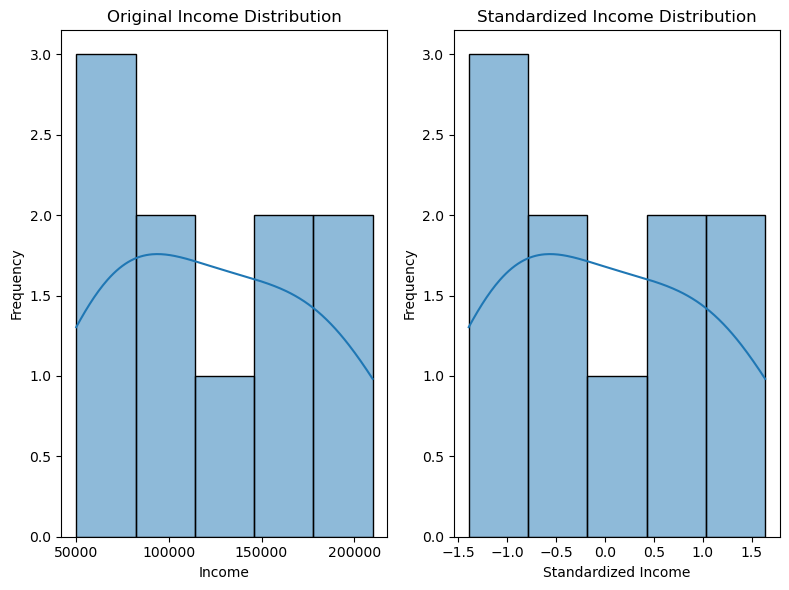

In [9]:
# Visualizing the effect
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.histplot(original_income, kde=True)
plt.title('Original Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(scaled_income, kde=True)
plt.title('Standardized Income Distribution')
plt.xlabel('Standardized Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Normalization: Scaling Data to a Fixed Range (0 to 1)

Normalization, often implemented using Scikit-learn's MinMaxScaler, is another fundamental feature scaling technique. Unlike standardization, which centers data around zero and scales it by standard deviation, normalization rescales the features to a fixed range, typically between 0 and 1.

The most common form of normalization scales features to a range of [0, 1]. 

#### Why Use Normalization?
Normalization is particularly useful in scenarios where:

**Algorithms require data within a specific range**: Some algorithms, like certain neural network activation functions (e.g., sigmoid, tanh), perform better when input features are within a bounded range.                                                                                                
**Distance calculations are sensitive to magnitude**: While standardization also addresses this, normalization can be preferred when the absolute range matters or when you want to ensure no feature dominates due to its scale.                                                                      
**Image Processing**: Pixel values are often normalized to the [0, 1] range for consistency and to match the expected input of image processing models.
**Algorithms that do not assume a specific distribution**: Algorithms like SVMs with certain kernels or tree-based models might not strictly require normalization, but it can sometimes still offer benefits.

#### When Normalization Might Be Preferred Over Standardization:
 - When you need features to be on a specific, bounded scale (e.g., for visualization or specific model requirements).                               
 - When dealing with algorithms that are sensitive to the magnitude of outliers, as normalization can compress the range of values. However, it's important to note that outliers can still significantly affect the min and max values, thus distorting the normalized range.


#### Hands-On: Scaling Features to a 0-1 Range with MinMaxScaler

In [13]:
from sklearn.preprocessing import MinMaxScaler
data2 = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [50000, 60000, 75000, 90000, 110000, 130000, 150000, 170000, 190000, 210000],
    'Experience': [2, 5, 8, 12, 15, 18, 22, 25, 28, 30]
}
df2 = pd.DataFrame(data2)
print(df2)

   Age  Income  Experience
0   25   50000           2
1   30   60000           5
2   35   75000           8
3   40   90000          12
4   45  110000          15
5   50  130000          18
6   55  150000          22
7   60  170000          25
8   65  190000          28
9   70  210000          30


In [15]:
scaler = MinMaxScaler()
df2_scaled = scaler.fit_transform(df2)

# converting scaled data into dataframe with same columns
df2_new = pd.DataFrame(df2_scaled, columns = df2.columns)
print(df2_new)

        Age   Income  Experience
0  0.000000  0.00000    0.000000
1  0.111111  0.06250    0.107143
2  0.222222  0.15625    0.214286
3  0.333333  0.25000    0.357143
4  0.444444  0.37500    0.464286
5  0.555556  0.50000    0.571429
6  0.666667  0.62500    0.714286
7  0.777778  0.75000    0.821429
8  0.888889  0.87500    0.928571
9  1.000000  1.00000    1.000000


In [18]:
# Finding min, max of normalized features
print('Min values of normalized features:', df2_scaled.min())
print('Max values of normalized features:', df2_scaled.max())

# Let's look at the effect on a single feature, e.g., 'Income'
original_income = df2['Income']
scaled_income = df2_new['Income']

print('Original Income Min:', original_income.min())
print('Original Income Max:', original_income.max())
print('Scaled Income Min:', scaled_income.min())
print('Scaled Income Max:', scaled_income.max())

Min values of normalized features: 0.0
Max values of normalized features: 1.0
Original Income Min: 50000
Original Income Max: 210000
Scaled Income Min: 0.0
Scaled Income Max: 1.0


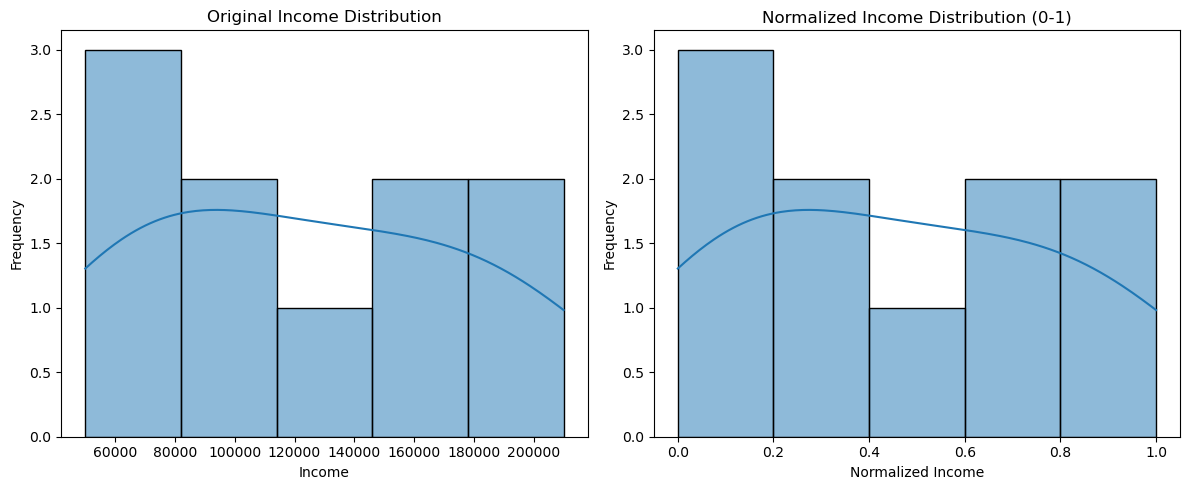

In [19]:
# Visualizing the effect
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(original_income, kde=True)
plt.title('Original Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(scaled_income, kde=True)
plt.title('Normalized Income Distribution (0-1)')
plt.xlabel('Normalized Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show() 

### General Guidelines and Best Practices:
                                       
**Default Choice**: If you are unsure, StandardScaler is often a good default choice for many algorithms, especially linear models and SVMs.          
**Neural Networks**: For neural networks, MinMaxScaler (to [0, 1] or [-1, 1]) is frequently used, especially when dealing with image data or when specific activation functions are employed.                                                                                                                                                                                                                    
**Tree-Based Models**: Algorithms like Decision Trees, Random Forests, and Gradient Boosting Machines (e.g., XGBoost, LightGBM) are generally insensitive to feature scaling. This is because they make decisions based on thresholds for individual features, and the relative order of values matters more than their absolute scale. However, scaling might still be applied in some ensemble methods or if other parts of the pipeline require it.
Always Scale After Splitting: This is a critical rule that we will discuss in detail next. Always fit your scaler on the training data and then use that fitted scaler to transform both the training and testing data.                                                                                   
**Consider Robust Scaling**: If your data has significant outliers, explore RobustScaler from Scikit-learn, which is less sensitive to extreme values.

### Implementing Scalers Correctly on Train/Test Splits

In [21]:
from sklearn.model_selection import train_test_split

np.random.seed(42) # for reproducibility
data3 = {
    'Feature1': np.random.rand(100) * 100, # Scale 0-100
    'Feature2': np.random.randn(100) * 15 + 50, # Normally distributed, mean 50, std 15
    'Feature3': np.random.randint(1, 1000, 100) # Integer scale 1-1000
}
dff = pd.DataFrame(data3)
print(dff)

     Feature1   Feature2  Feature3
0   37.454012  51.305706       226
1   95.071431  45.514890       277
2   73.199394  51.376412       798
3   59.865848  20.186466       609
4   15.601864  46.704922       284
..        ...        ...       ...
95  49.379560  37.762846       400
96  52.273283  48.843474       654
97  42.754102  55.117280       972
98   2.541913  54.150362       883
99  10.789143  62.407749       471

[100 rows x 3 columns]


In [25]:
X = dff[['Feature1', 'Feature2']]           # indepenedent variable
y = dff['Feature3']    # dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)   # Fit the scaler ONLY on the training data

# Transform BOTH the training and testing data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled NumPy arrays back to Pandas DataFrames
X_train_new = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_new = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print('Correctly scaled training set (first 5 rows):')
print(X_train_new.head())
print('Mean of scaled training set Feature1:', X_train_new['Feature1'].mean())
print('Std Dev of scaled training set Feature1:', X_train_new['Feature1'].std())

print('Correctly scaled testing set (first 5 rows):')
print(X_test_new.head())
print('Mean of correctly scaled testing set Feature1:', X_test_new['Feature1'].mean())
print('Std Dev of correctly scaled testing set Feature1:', X_test_new['Feature1'].std())

Correctly scaled training set (first 5 rows):
    Feature1  Feature2
55  1.558116  0.122319
88  1.439100  1.086469
26 -0.921682 -0.320828
42 -1.489217  1.279821
69  1.781348  0.890848
Mean of scaled training set Feature1: -3.3306690738754695e-17
Std Dev of scaled training set Feature1: 1.0063092108532554
Correctly scaled testing set (first 5 rows):
    Feature1  Feature2
83 -1.389058  0.755872
53  1.465246 -0.494046
70  1.044338 -1.284356
45  0.667587 -0.931411
44 -0.718731  0.900770
Mean of correctly scaled testing set Feature1: 0.03574762444559235
Std Dev of correctly scaled testing set Feature1: 1.1068772582797604


In [29]:
# Before scaling:
print('--- Comparison Before Scaling ---')
print('Train Feature1 Mean:', X_train['Feature1'].mean())
print('Train Feature1 Std Dev:', X_train['Feature1'].std())
print('Test Feature1 Mean:', X_test['Feature1'].mean())
print('Test Feature1 Std Dev:', X_test['Feature1'].std())

# After correct scaling:
print('--- Comparison After Correct Scaling ---')
print('Scaled Train Feature1 Mean:', X_train_new['Feature1'].mean()) # Should be close to 0
print('Scaled Train Feature1 Std Dev:', X_train_new['Feature1'].std()) # Should be close to 1
print('Scaled Test Feature1 Mean:', X_test_new['Feature1'].mean()) # Should also be close to 0
print('Scaled Test Feature1 Std Dev:', X_test_new['Feature1'].std()) # Should also be close to 1

--- Comparison Before Scaling ---
Train Feature1 Mean: 46.80985616877852
Train Feature1 Std Dev: 29.307102866833084
Test Feature1 Mean: 47.85094701399058
Test Feature1 Std Dev: 32.235982061475504
--- Comparison After Correct Scaling ---
Scaled Train Feature1 Mean: -3.3306690738754695e-17
Scaled Train Feature1 Std Dev: 1.0063092108532554
Scaled Test Feature1 Mean: 0.03574762444559235
Scaled Test Feature1 Std Dev: 1.1068772582797604


In [30]:
# Illustration prompt for visualization
# Create a diagram illustrating the train/test split and scaling process.
# It should show:
# 1. Original Data -> Split into Train Data and Test Data.
# 2. Train Data -> Fit Scaler (calculates mean/std).
# 3. Scaler (fitted on Train) -> Transform Train Data.
# 4. Scaler (fitted on Train) -> Transform Test Data.

### Navigating the Pitfalls: Common Mistakes in Feature Scaling

1. **Data Leakage**
   - Never fit the scaler on the full dataset.
   - Always fit on **training data only**, then transform train & test.

2. **Scaling Categorical Features**
   - Scalers work only on numerical data.
   - Categorical features need encoding (One-Hot, Label Encoding).

3. **Not Scaling All Numerical Features**
   - Leaving some numerical features unscaled can bias the model.
   - Scale all relevant numeric inputs consistently.

4. **Different Scalers for Train & Test**
   - Use the **same scaler instance** for both.
   - Do not mix scalers (e.g., StandardScaler for train, MinMaxScaler for test).

5. **Ignoring Outliers**
   - MinMaxScaler is sensitive to outliers.
   - Use **RobustScaler** or handle outliers before scaling.

6. **Scaling Target Variable**
   - Usually scale only features, not the target.
   - If target is scaled, apply `inverse_transform()` on predictions.

7. **Scaling & Overfitting**
   - Scaling doesn’t cause overfitting directly.
   - Regularization parameters must be tuned after scaling.

8. **Not Reversing Scaling**
   - Predictions on scaled data must be converted back.
   - Use `inverse_transform()` for correct interpretation.

### Demonstrating the Impact of Scaling on Model Performance

**Scenario: Predicting House Prices**
Let's imagine a simplified dataset for predicting house prices with two numerical features: 'Square Footage' and 'Number of Rooms'.

**Model: Linear Regression**
Linear Regression is sensitive to feature scales, making it a good candidate to showcase the benefits of scaling.

**Performance Metric: Mean Squared Error (MSE)**
MSE measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. A lower MSE indicates better performance.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [33]:
# 1. Create a synthetic dataset for house price prediction
np.random.seed(42)
n_samples = 100
square_footage = np.random.rand(n_samples) * 2000 + 500 # Range: 500 - 2500 sq ft
num_rooms = np.random.randint(1, 6, n_samples) # Range: 1 - 5 rooms
house_price = (square_footage * 150) + (num_rooms * 20000) + np.random.randn(n_samples) * 50000

data = {
    'SquareFootage': square_footage,
    'NumRooms': num_rooms,
    'Price': house_price
}
df = pd.DataFrame(data)

print('Original DataFrame (first 5 rows):')
print(df.head())

Original DataFrame (first 5 rows):
   SquareFootage  NumRooms          Price
0    1249.080238         1  165482.966066
1    2401.428613         4  474073.595202
2    1963.987884         5  488214.138409
3    1697.316968         4  354416.242262
4     812.037281         5  190524.777371


In [35]:
# 2. Split the data into train and test datatset
X = df[['SquareFootage','NumRooms']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# 3. Scenario 1: Train Linear Regression on RAW data
print('--- Scenario 1: Training on RAW Data ---')
model_raw = LinearRegression()
model_raw.fit(X_train, y_train)

# Predicting for test data
y_pred = model_raw.predict(X_test)
# Evaluating Performace
mse_raw = mean_squared_error(y_test, y_pred)
print(f'MSE on RAW data: {mse_raw:.2f}')
# Displaying coefficients
print(f'SquareFootage: {model_raw.coef_[0]:.2f}')
print(f'NumRooms: {model_raw.coef_[1]:.2f}')

--- Scenario 1: Training on RAW Data ---
MSE on RAW data: 2384027731.80
SquareFootage: 150.28
NumRooms: 22414.28


In [42]:
# 4. Scenario 2: Train Linear Regression on SCALED data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converting back to dataframe
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print('Scaled Training Data (first 5 rows):')
print(X_train_scaled_df.head())
print('Scaled Testing Data (first 5 rows):')
print(X_test_scaled_df.head())

# Train Linear Regression on SCALED data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled_df, y_train)

# Predictng on scaled dataset
y_scaled_pred = model_scaled.predict(X_test_scaled_df)
# Evaluating performace
mse_scaled = mean_squared_error(y_test, y_scaled_pred)
print(f'MSE on SCALED data: {mse_scaled:.2f}')
# Displaying coefficients
print(f'SquareFootage: {model_scaled.coef_[0]:.2f}')
print(f'NumRooms: {model_scaled.coef_[1]:.2f}')

Scaled Training Data (first 5 rows):
    SquareFootage  NumRooms
55       1.558116 -1.380514
88       1.439100  0.053786
26      -0.921682 -1.380514
42      -1.489217  0.770936
69       1.781348 -0.663364
Scaled Testing Data (first 5 rows):
    SquareFootage  NumRooms
83      -1.389058  0.053786
53       1.465246 -1.380514
70       1.044338  0.770936
45       0.667587  0.770936
44      -0.718731 -1.380514
MSE on SCALED data: 2384027731.80
SquareFootage: 87533.50
NumRooms: 31254.67


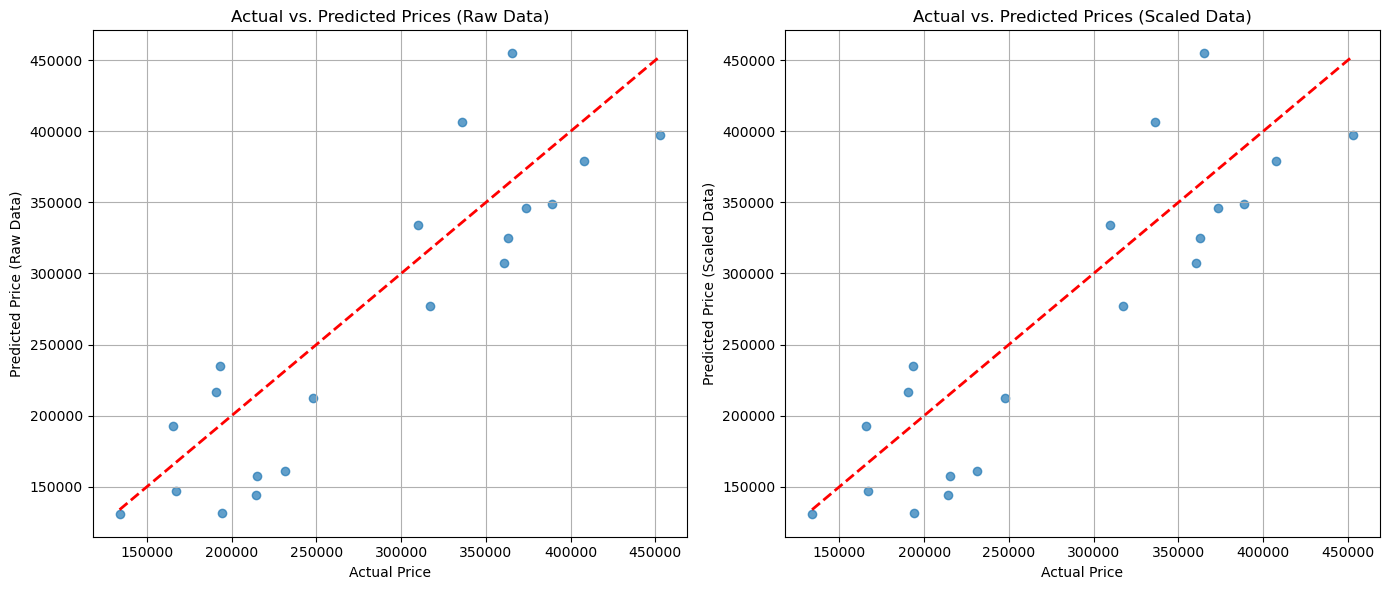

In [45]:
# 5. Visualizing the effect on predictions
plt.figure(figsize=(14, 6))

# Plot for RAW data predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price (Raw Data)')
plt.title('Actual vs. Predicted Prices (Raw Data)')
plt.grid(True)

# Plot for SCALED data predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_scaled_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price (Scaled Data)')
plt.title('Actual vs. Predicted Prices (Scaled Data)')
plt.grid(True)

plt.tight_layout()
plt.show()